# Lead Scoring Case Study

In [1]:
# importing the Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# To Supress Warnings

import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [3]:
# Load the Dataset 

df= pd.read_csv("C:/Users/narai/Downloads/Leads.csv")

## Data Understanding 

In [4]:
# To Get a short preview of the loaded dataset

df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# To get the Numerical Description of the Dataset 

df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
# To get the Information about the dataset columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
#To Check the number of Rows and Columns in the Dataset

df.shape

(9240, 37)

## There are (9240, 37) --- (Rows, Columns) in the Dataset

In [8]:
# list of all the columns in the dataset

df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [9]:
# To check the Duplicates in the column

sum(df.duplicated(subset = 'Prospect ID')) == 0

True

In [10]:
# To check the Duplicates in the column

sum(df.duplicated(subset = 'Lead Number')) == 0

True

In [11]:
# Dropping the columns 'Prospect ID', 'Lead Number'

df.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [12]:
# Replacing the 'Select' to NaN 

df = df.replace('Select', np.nan)

In [13]:
# To check the umber of Unique values in every column of the dataset

df.nunique()

Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                   

In [14]:
#Dropping the columns which have only one Unique values

df= df.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)


## Handling Null values

In [15]:
# To check the null values in the dataset

df.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement       

In [16]:
# To get the precentage of null values in the dataset

round(100*(df.isnull().sum())/len(df.index),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [17]:
# Dropping the columns Which have null values greater than 45% 

cols=df.columns

for i in cols:
    if((100*(df[i].isnull().sum()/len(df.index))) >= 45):
        df.drop(i, 1, inplace = True)

In [18]:
# To get the precentage of null values in the dataset

round(100*(df.isnull().sum())/len(df.index),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

In [19]:
#To Check the number of Rows and Columns in the Dataset

df.shape

(9240, 23)

In [20]:
# Handling the null values 

df['Specialization'] = df['Specialization'].fillna('Not Specified')
df['City'] = df['City'].fillna('Not Specified')
df['Tags'] = df['Tags'].fillna('Not Specified')
df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].fillna('Not Specified')
df['What is your current occupation'] = df['What is your current occupation'].fillna('Not Specified')
df['Country'] = df['Country'].fillna('Not Specified')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        9240 

In [21]:
# To get the precentage of null values in the dataset

round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations     

In [22]:
#To Check the number of Rows and Columns in the Dataset

df.shape

(9240, 23)

## Analysis of Catagorical Columns

In [23]:
# To Get the value counts of 'Country' Column

df['Country'].value_counts()

India                   6492
Not Specified           2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Canada                     4
South Africa               4
Kuwait                     4
Nigeria                    4
Germany                    4
Sweden                     3
Bangladesh                 2
Netherlands                2
Uganda                     2
Belgium                    2
Ghana                      2
Italy                      2
China                      2
Philippines                2
Asia/Pacific Region        2
Denmark                    1
Vietnam                    1
Switzerland                1
Sri Lanka                  1
Indonesia                  1
Tanzania      

In [24]:
def slots(x):
    category = ""
    if x == "India":
        category = "India"
    elif x == "Not Specified":
        category = "Not Specified"
    else:
        category = "outside india"
    return category

df['Country'] = df.apply(lambda x:slots(x['Country']), axis = 1)
df['Country'].value_counts()

India            6492
Not Specified    2461
outside india     287
Name: Country, dtype: int64

In [25]:
# Replacing with India

df['Country'] = df['Country'].replace('Not Specified','India')
df['Country'].value_counts()


India            8953
outside india     287
Name: Country, dtype: int64

In [26]:
round(100*(sum(df.isnull().sum(axis=1) > 1)/df.shape[0]),2)

1.48

In [27]:
df= df[df.isnull().sum(axis=1) <1]

In [28]:
# To get the precentage of null values in the dataset

round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

In [29]:
#To Check the number of Rows and Columns in the Dataset

df.shape

(9074, 23)

# Exploratory Data Understanding

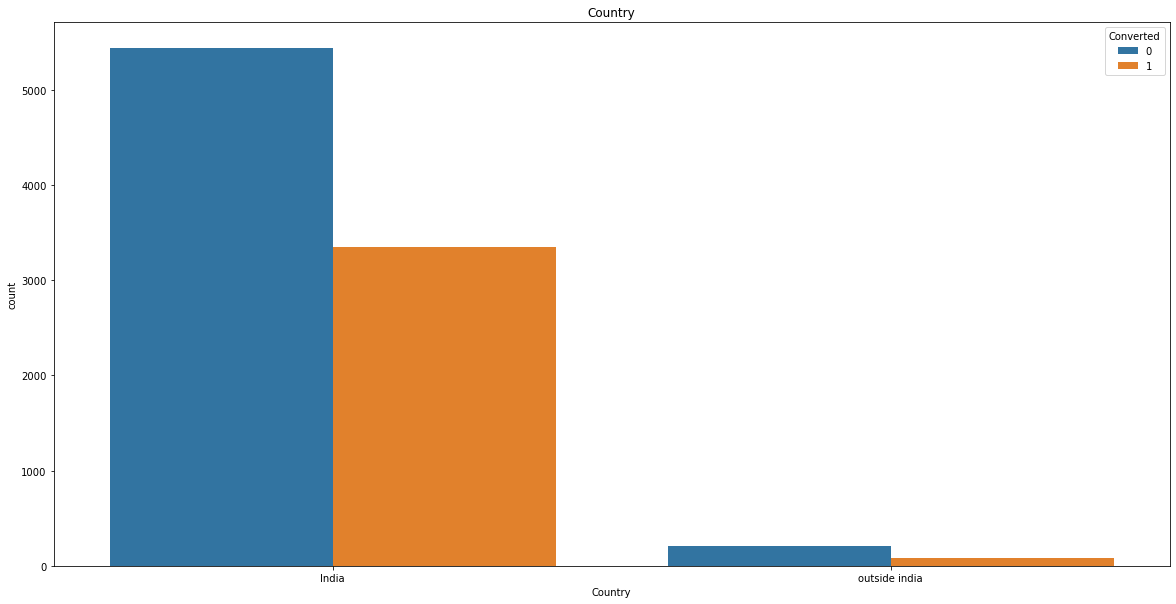

In [30]:
# Countplot for Country

plt.figure(figsize=(20,10))
s1=sns.countplot(df.Country, hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels())
plt.title('Country')
plt.show()

###  The count of India is very high when compared the others

In [31]:
cols_to_drop=['Country']

In [32]:
df['City'].value_counts(dropna=False)

Not Specified                  3575
Mumbai                         3177
Thane & Outskirts               745
Other Cities                    680
Other Cities of Maharashtra     446
Other Metro Cities              377
Tier II Cities                   74
Name: City, dtype: int64

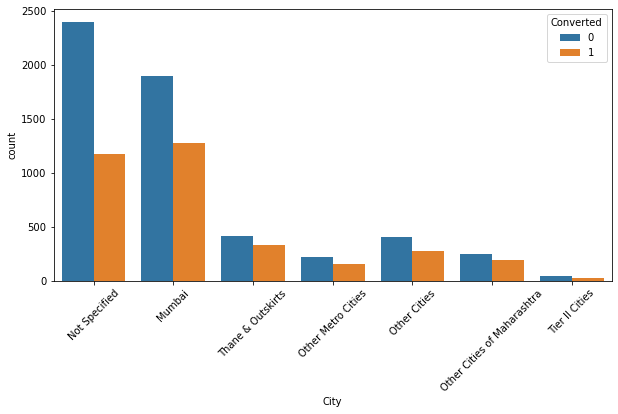

In [33]:
# Countplot for City

plt.figure(figsize=(10,5))
s1=sns.countplot(df.City, hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()

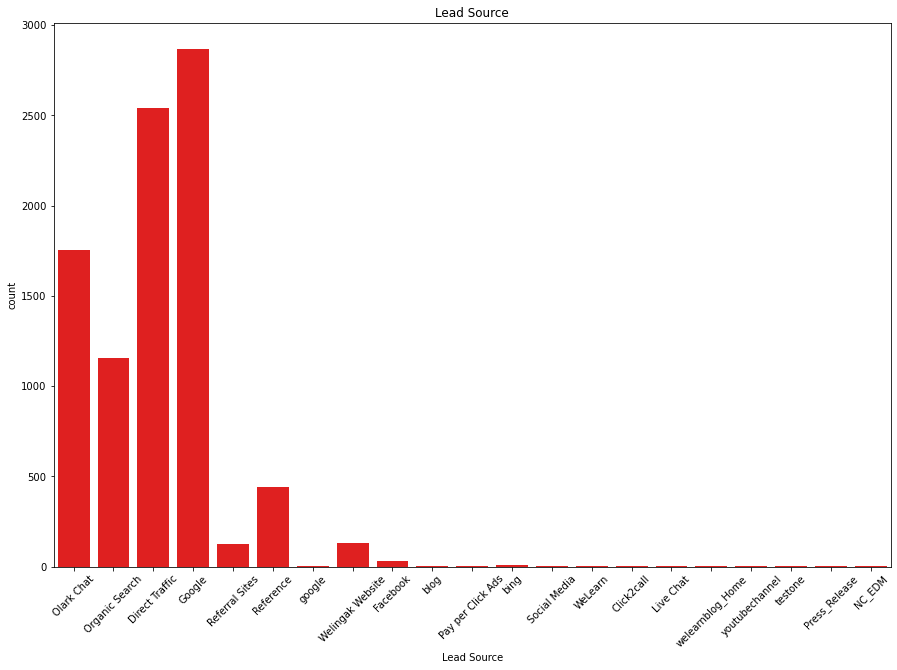

In [34]:
# Countplot for Lead Score

plt.figure(figsize=(15,10))
sns.countplot(df['Lead Source'],color="red").tick_params(axis='x', rotation = 45)
plt.title('Lead Source')
plt.show()

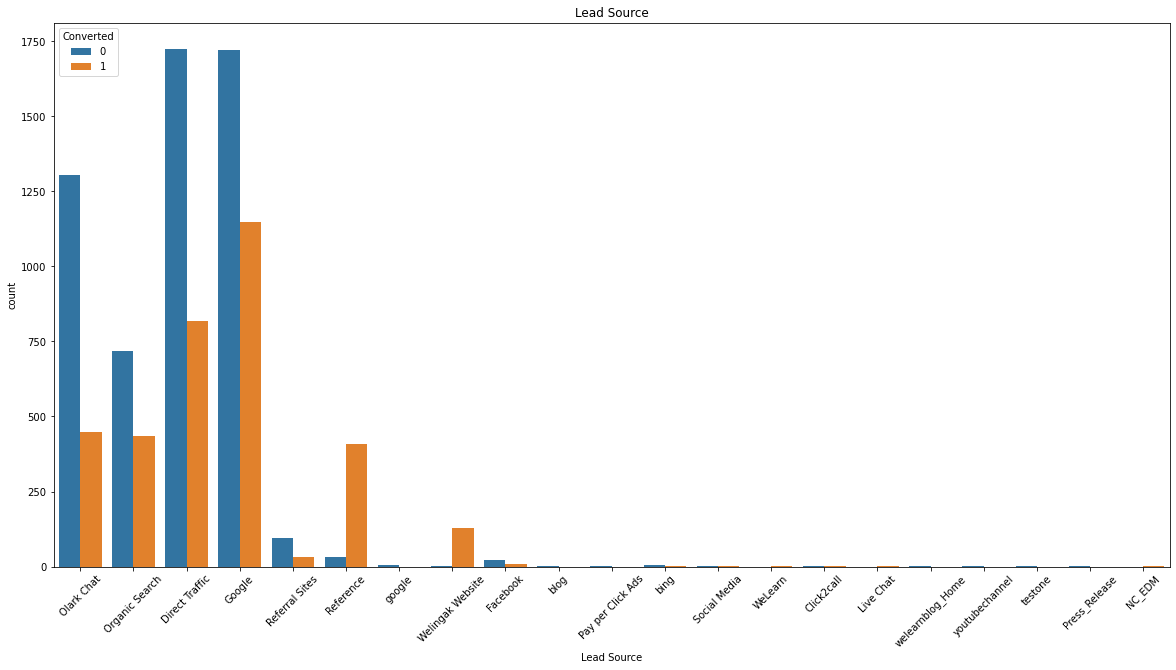

In [35]:
# Countplot for Lead Score along with 'converted' data

plt.figure(figsize = (20,10))

sns.countplot(x='Lead Source', hue='Converted', data= df).tick_params(axis='x', rotation = 45)
plt.title('Lead Source')
plt.show()

Text(0.5, 1.0, 'Current Occupation')

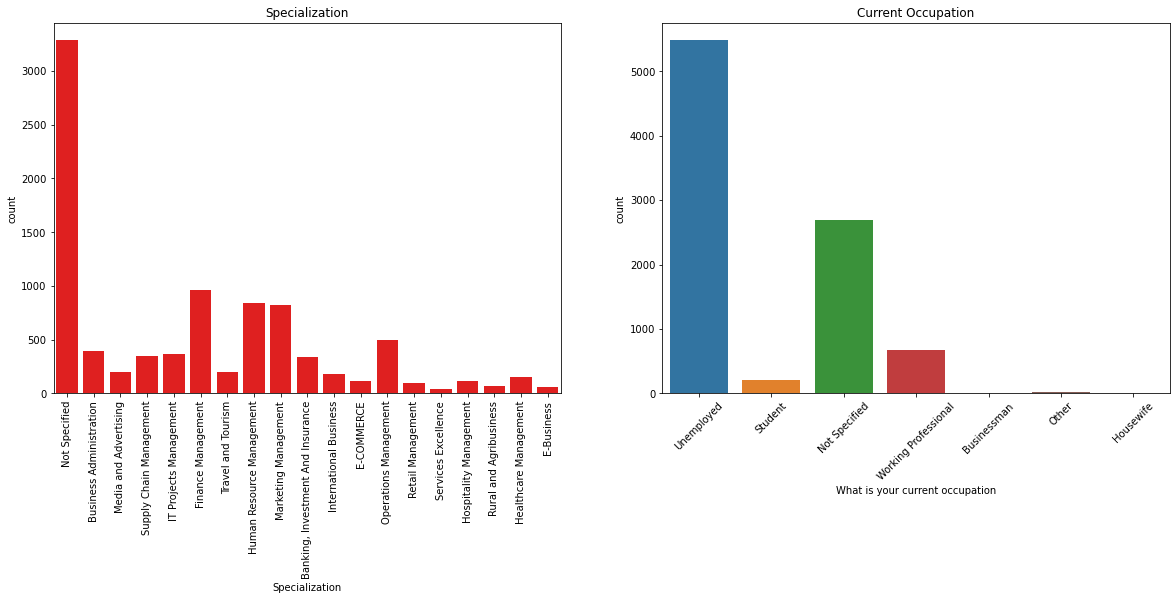

In [36]:
# Countplot for Specialization

plt.figure(figsize = (20,15))
plt.subplot(2,2,1)
sns.countplot(df['Specialization'],color="red").tick_params(axis='x', rotation = 90)
plt.title('Specialization')

# Countplot for What is your current occupation
plt.subplot(2,2,2)
sns.countplot(df['What is your current occupation']).tick_params(axis='x', rotation = 45)
plt.title('Current Occupation')


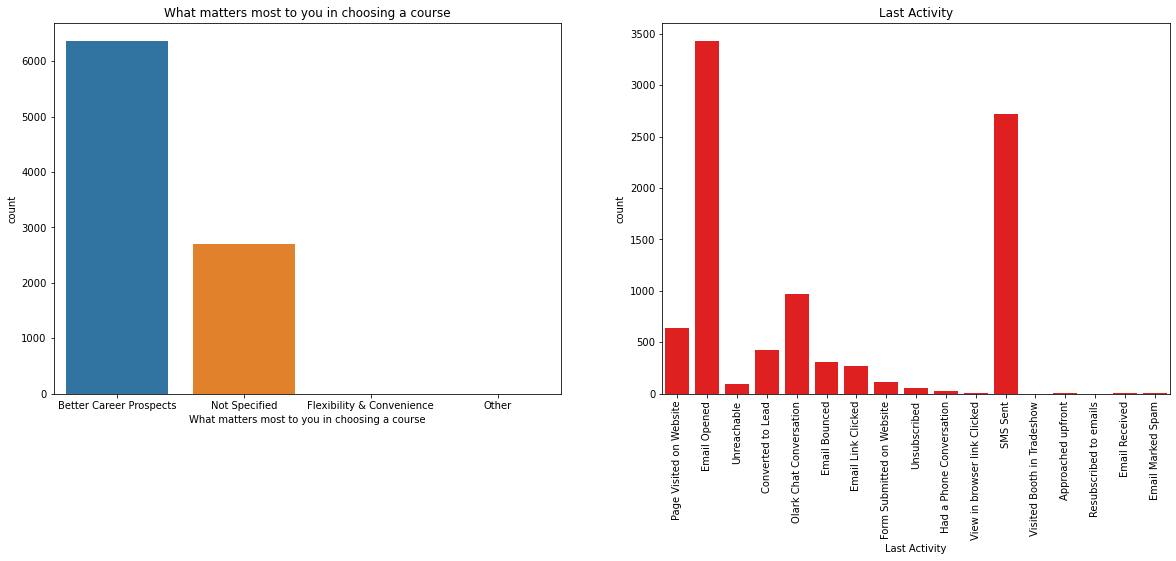

In [37]:
# Countplot

plt.figure(figsize = (20,15))

plt.subplot(2,2,1)
sns.countplot(df['What matters most to you in choosing a course'])
plt.title('What matters most to you in choosing a course')
plt.subplot(2,2,2)
sns.countplot(df['Last Activity'],color="red").tick_params(axis='x', rotation = 90)
plt.title('Last Activity')
plt.show()

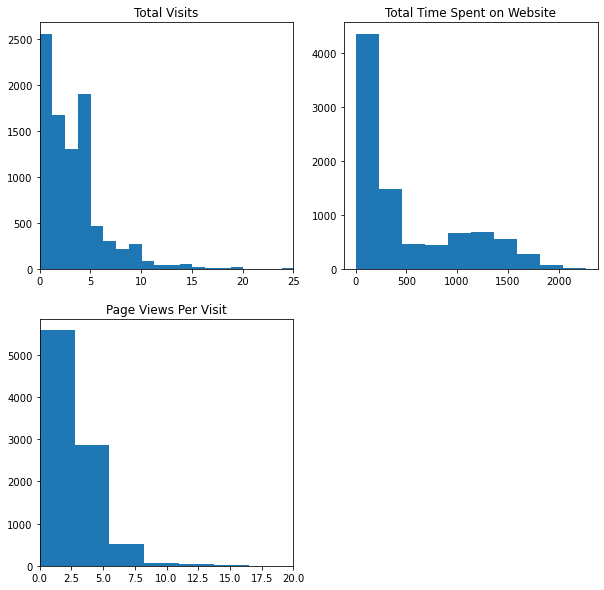

In [38]:
# Histogram

plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(df['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(df['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(df['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show( )

Text(0.5, 1.0, 'Lead Origin')

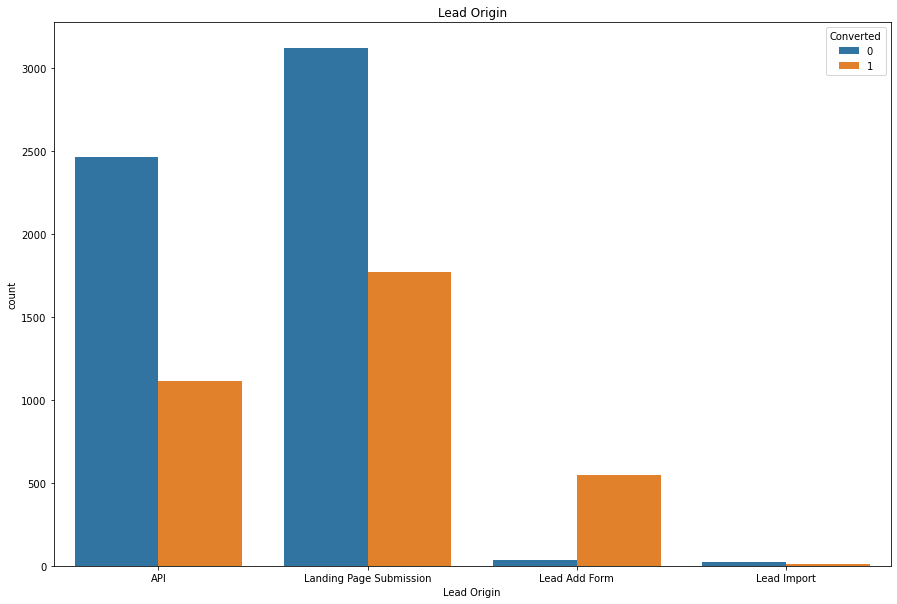

In [39]:
# Countplot for Lead Origin along with 'converted' data

plt.figure(figsize = (15,10))

sns.countplot(x='Lead Origin', hue='Converted', data= df)
plt.title('Lead Origin')



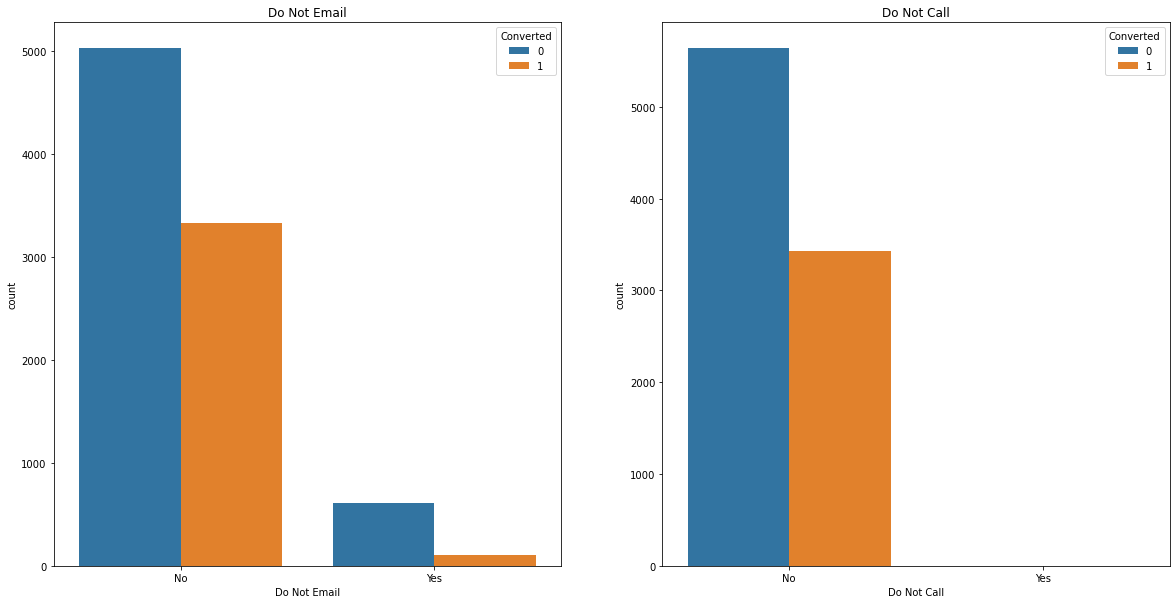

In [40]:
# Countplot

plt.figure(figsize=(20 ,10))
plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= df)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data= df)
plt.title('Do Not Call')
plt.show()

Text(0.5, 1.0, 'Last Activity')

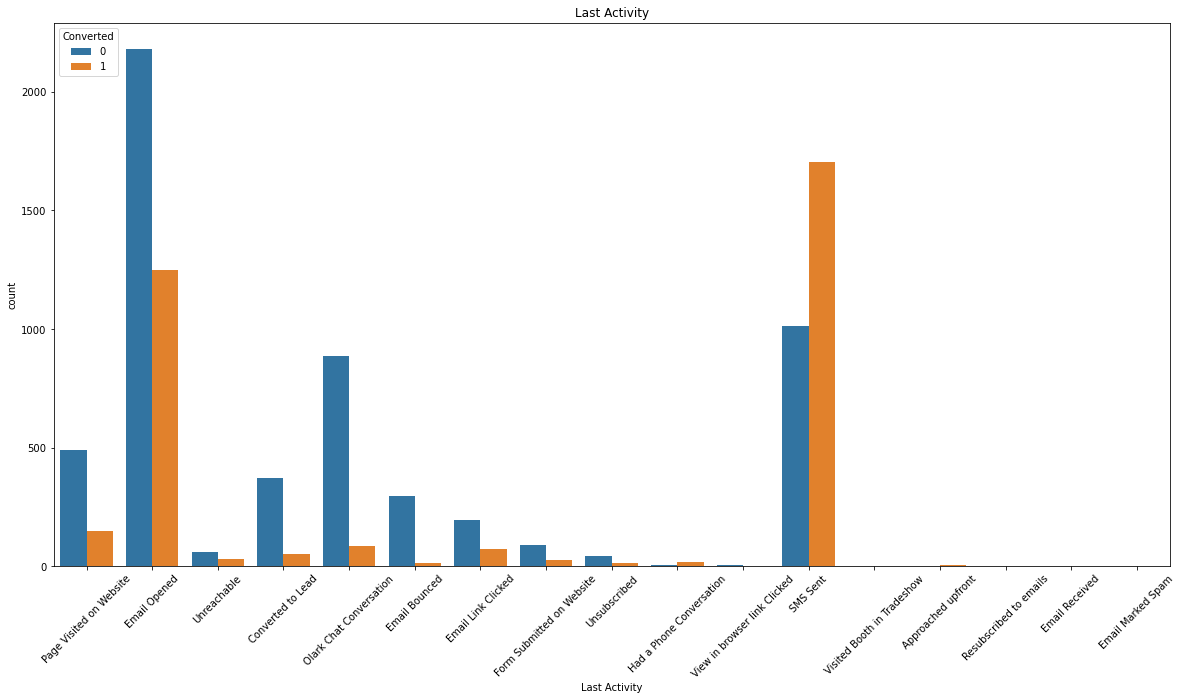

In [41]:
# Countplot for Last Activity along with 'converted' data

plt.figure(figsize = (20,10))


sns.countplot(x='Last Activity', hue='Converted', data= df).tick_params(axis='x', rotation = 45)
plt.title('Last Activity')


Text(0.5, 1.0, 'Specialization')

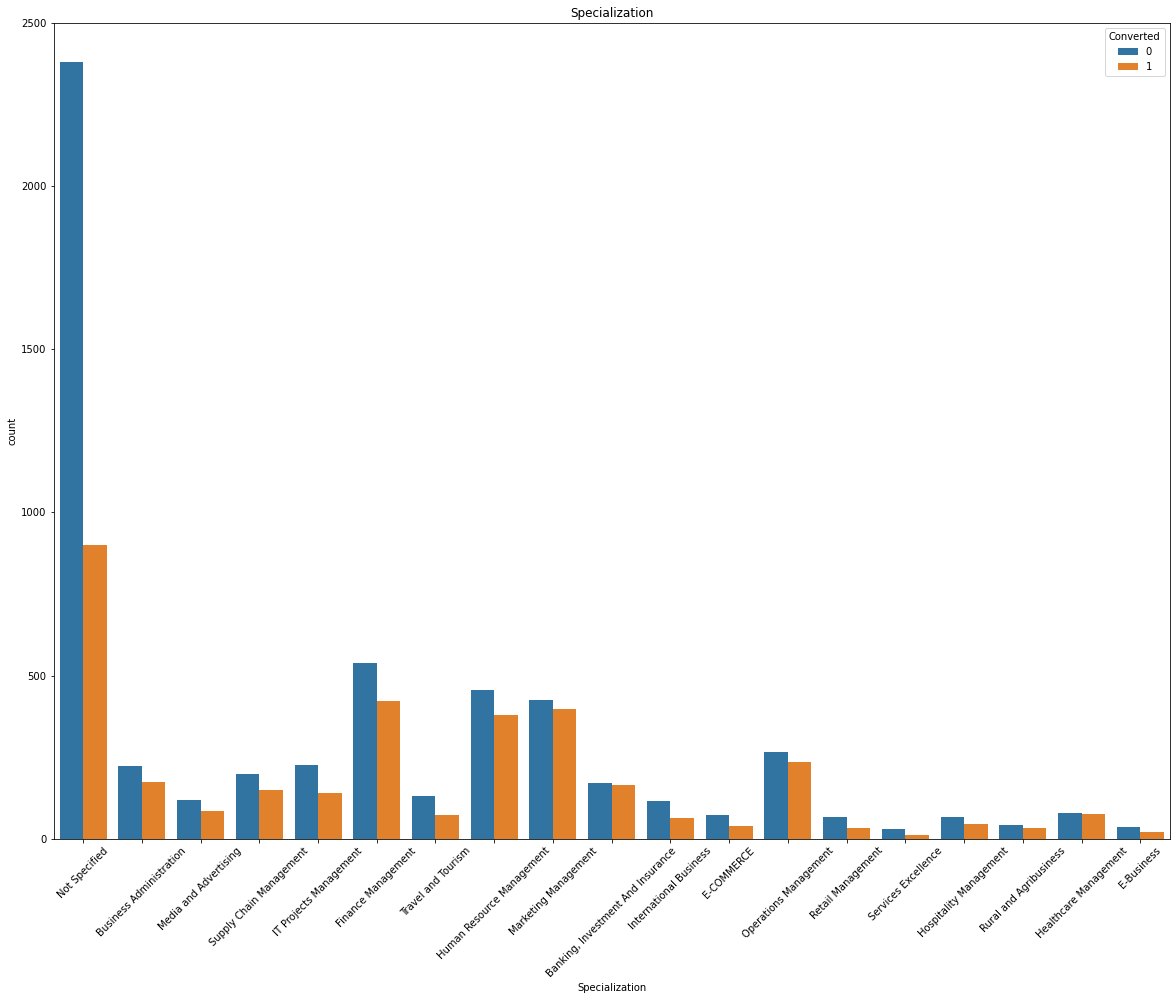

In [42]:
# Countplot for Specialization along with 'converted' data

plt.figure(figsize = (20,15))

sns.countplot(x='Specialization', hue='Converted', data= df).tick_params(axis='x', rotation = 45)
plt.title('Specialization')

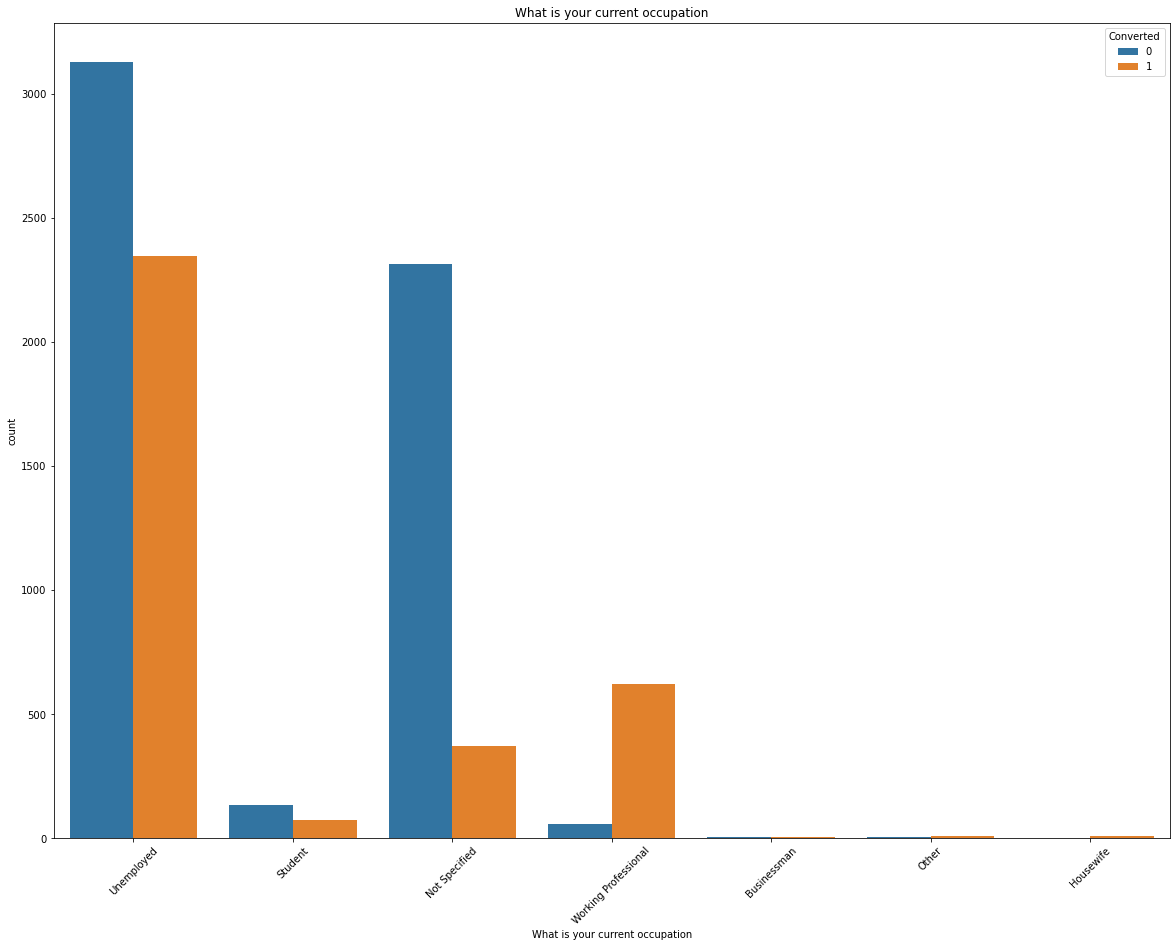

In [43]:
# Countplot

plt.figure(figsize = (20,15))
sns.countplot(x='What is your current occupation', hue='Converted', data= df).tick_params(axis='x', rotation = 45)
plt.title('What is your current occupation')
plt.show()

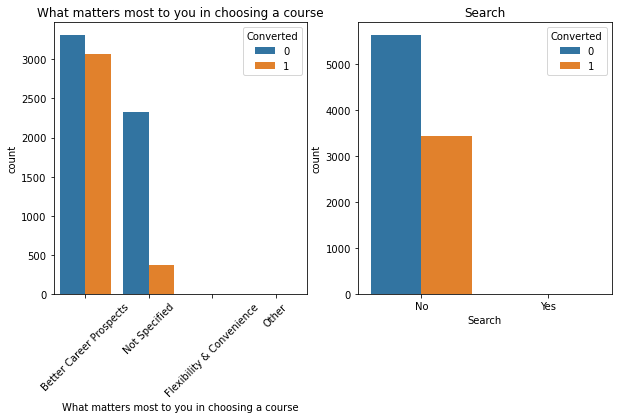

In [44]:
# Countplot

plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= df).tick_params(axis='x', rotation = 45)
plt.title('What matters most to you in choosing a course')

plt.subplot(1,2,2)
sns.countplot(x='Search', hue='Converted', data= df)
plt.title('Search')
plt.show()

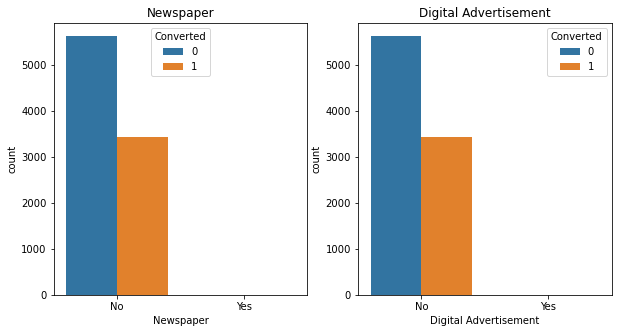

In [45]:
# Countplot

plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper', hue='Converted', data= df)
plt.title('Newspaper')

plt.subplot(1,2,2)
sns.countplot(x='Digital Advertisement', hue='Converted', data= df)
plt.title('Digital Advertisement')
plt.show()

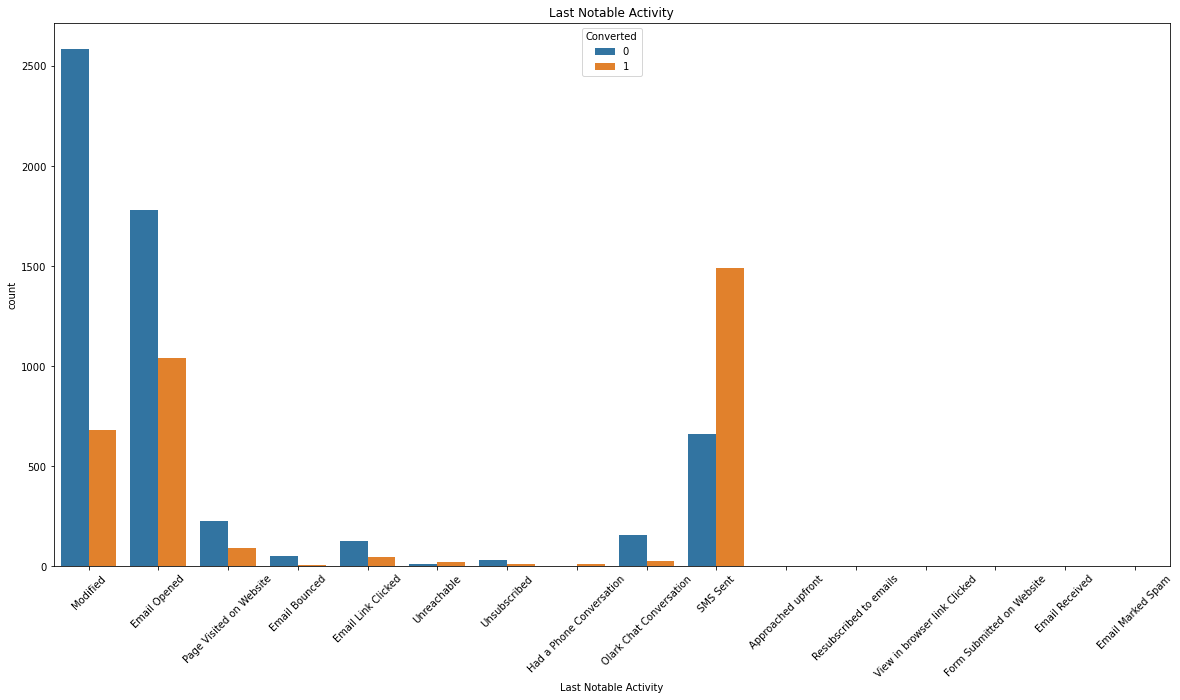

In [46]:
# Countplot for Last Notable Activity along with 'converted' data

plt.figure(figsize = (20,10))

sns.countplot(x='Last Notable Activity', hue='Converted', data= df).tick_params(axis='x', rotation = 45)
plt.title('Last Notable Activity')
plt.show()

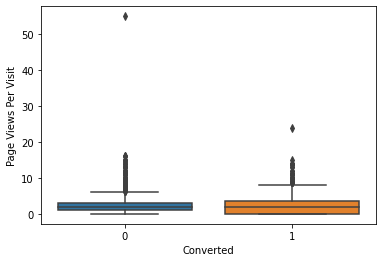

In [47]:
# Boxplot

sns.boxplot(x=df.Converted,y=df['Page Views Per Visit'])
plt.show()

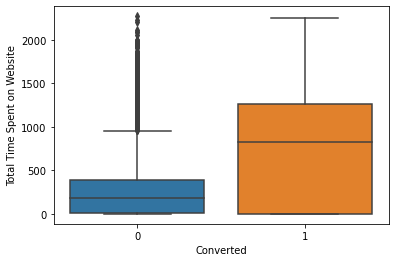

In [48]:
# Boxplot

sns.boxplot(x=df.Converted, y=df['Total Time Spent on Website'])
plt.show()

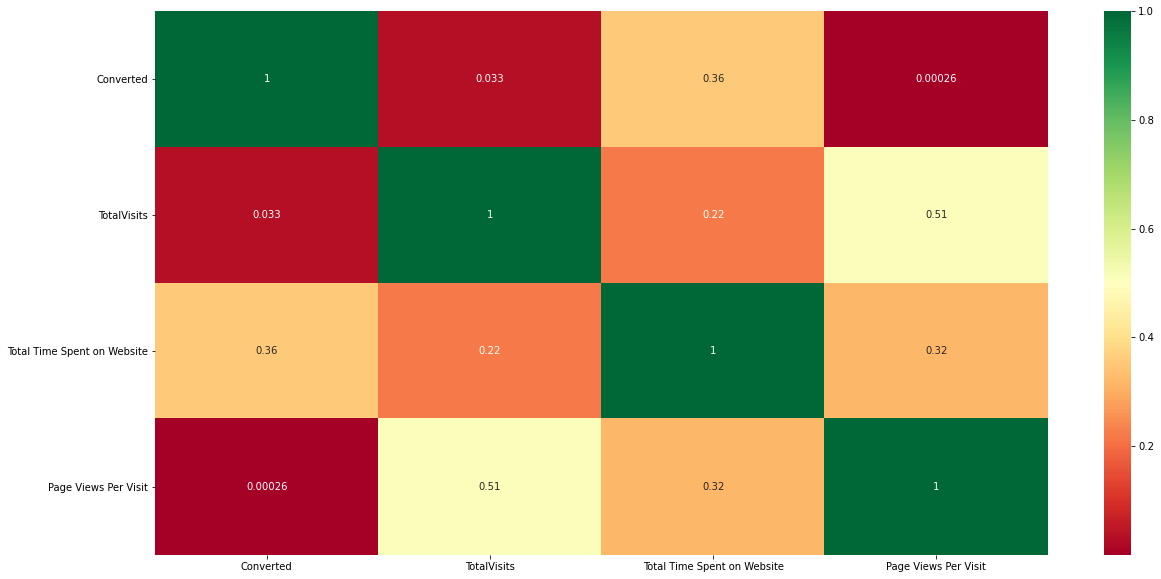

In [49]:
# Corelation among varibles

plt.figure(figsize=(20,10))

sns.heatmap(df.corr(), cmap="RdYlGn", annot=True)
plt.show()

In [50]:
numeric = df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
99%,17.000000,1839.000000,9.000000
max,251.000000,2272.000000,55.000000


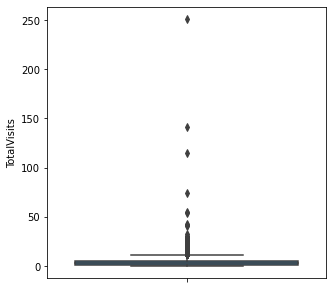

In [51]:
# Boxplot

plt.figure(figsize = (5,5))
sns.boxplot(y=df['TotalVisits'])
plt.show()

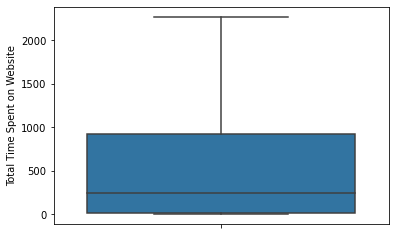

In [52]:
# Boxplot

sns.boxplot(y=df['Total Time Spent on Website'])
plt.show()

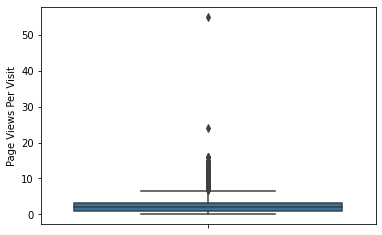

In [53]:
# Boxplot

sns.boxplot(y=df['Page Views Per Visit'])
plt.show()

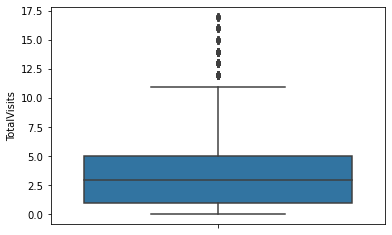

In [54]:
# Boxplot

Q3 = df.TotalVisits.quantile(0.99)
df= df[(df.TotalVisits <= Q3)]
Q1 = df.TotalVisits.quantile(0.01)
df = df[(df.TotalVisits >= Q1)]
sns.boxplot(y=df['TotalVisits'])
plt.show()

In [55]:
# Columns to be Dropped

cols_to_drop=['Country','Tags']

###  As Tags column is generated internally, it is dropped. It might affect the model accuracy.

In [56]:
df= df.drop(cols_to_drop,1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8991 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    8991 non-null   object 
 1   Lead Source                                    8991 non-null   object 
 2   Do Not Email                                   8991 non-null   object 
 3   Do Not Call                                    8991 non-null   object 
 4   Converted                                      8991 non-null   int64  
 5   TotalVisits                                    8991 non-null   float64
 6   Total Time Spent on Website                    8991 non-null   int64  
 7   Page Views Per Visit                           8991 non-null   float64
 8   Last Activity                                  8991 non-null   object 
 9   Specialization                                 8991 

## Data Preparation

## Creating Dummy variables

In [57]:
# To get the list of Categorical Columns

cat_cols= df.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [58]:
# Creating Dummy variables for Categorical Columns 

dummy = pd.get_dummies(df[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)

# Merging the dummy variables with the dataset

df_dum = pd.concat([df, dummy], axis=1)
df_dum

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,Not Specified,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,Not Specified,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,Business Administration,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,Media and Advertising,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,Not Specified,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,IT Projects Management,...,0,0,0,0,0,0,0,0,0,0
9236,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,Media and Advertising,...,0,0,0,0,0,0,1,0,0,0
9237,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,Business Administration,...,0,0,0,0,0,0,1,0,0,0
9238,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,Human Resource Management,...,0,0,0,0,0,0,1,0,0,0


In [59]:
# Dropping the columns

df_dum = df_dum.drop(['City','What is your current occupation_Not Specified','Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Specialization', 'Specialization_Not Specified','What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity'], 1)
df_dum

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.00,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,0,2.0,238,2.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,0,2.0,199,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
9238,1,3.0,499,3.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


## Splitting the Data into Train and Test

In [60]:
# Importing "train_test_split" from sklearn

from sklearn.model_selection import train_test_split

In [61]:
# Dropping the Target variable 

X = df_dum.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [62]:
# The Target variable

y = df_dum['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

## Splitting the data into Train and test in the ratio of (Train : Test - 70:30)

In [63]:
# Splitting the dataset into Traning and Test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [64]:
# Importing "MinMaxScaler" from sklearn

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1467,0.235294,0.393486,0.25000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
108,0.352941,0.175176,0.18750,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
7858,0.647059,0.055458,0.07625,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5220,0.000000,0.000000,0.00000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3871,0.000000,0.000000,0.00000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#  Building a LogisticRegression model

In [65]:
# Importing "LogisticRegression" from sklearn

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [66]:
# Importing RFE from sklearn 
# Using Recursive feature selection for feature selection in the model

from sklearn.feature_selection import RFE

In [67]:
# Fitting RFE

rfe = RFE(lr, n_features_to_select = 20)  # 20 features to be selected    
rfe = rfe.fit(X_train, y_train)

In [68]:
# list of Features selected Using RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', False, 26),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 58),
 ('Specialization_Business Administration', False, 34),
 ('Specialization_E-Business', False, 18),
 ('Specialization_E-COMMERCE', False, 24),
 ('Specialization_Finance Management', False, 27),
 ('Specialization_Healthcare Management', False, 31),
 ('Specialization_Hospitality Management', False, 59),
 ('Specialization_Human Resource Management', False, 30),
 ('Specialization_IT Projects Management', False, 32),
 ('Specialization_International Business', False, 36),
 ('Specialization_Marketing Management', False, 28),
 ('Specialization_Media and Advertising', False, 35),
 ('Specialization_Operations Management', False, 33),
 ('Specialization_Retail Management', False, 49),
 ('Specialization_Rural and Agribusiness', False, 15),
 ('Specialization_Servi

In [69]:
col = X_train.columns[rfe.support_]

In [70]:
X_train = X_train[col]

In [71]:
# Importing statsmodels

import statsmodels.api as sm

In [72]:
# Building a LogisticRegression model

X_train_sm = sm.add_constant(X_train)
lgm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = lgm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6272
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2505.9
Date:                Thu, 24 Aug 2023   Deviance:                       5011.7
Time:                        20:23:18   Pearson chi2:                 6.46e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4101
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3332      0.121     -2.761      0.006      -0.570      -0.097
TotalVisits                                              1.6794      0.304      5.527      0.000       1.084       2.275
Total Time Spent on Website                              4.6396      0.172     27.019      0.000       4.303       4.976
Page Views Per Visit                                    -1.4283      0.431     -3.313      0.001      -2.273      -0.583
Lead Origin_Lead Add Form                                2.7772      0.264     10.533      0.000       2.260       3.294
Lead Source_Direct Traffic                              -1.6810      0.134    -12.555      0.000      -1.943      -1.419
Lead Source_Google                                      -1.2843      0.132     -9.744      0.000      -1.543      -1.026
Lead Source_Organic Search                              -1.4902      0.163     -9.123      0.000      -1.810      -1.170
Lead Source_Referral Sites                              -1.4269      0.364     -3.917      0.000      -2.141      -0.713
Lead Source_Welingak Website                             2.3494      1.046      2.245      0.025       0.299       4.400
Do Not Email_Yes                                        -1.7942      0.178    -10.081      0.000      -2.143      -1.445
Last Activity_Olark Chat Conversation                   -1.1525      0.195     -5.913      0.000      -1.535      -0.770
What is your current occupation_Housewife               23.7780   1.79e+04      0.001      0.999    -3.5e+04    3.51e+04
What is your current occupation_Student                  1.1484      0.240      4.793      0.000       0.679       1.618
What is your current occupation_Unemployed               1.0738      0.089     12.101      0.000       0.900       1.248
What is your current occupation_Working Professional     3.6212      0.203     17.868      0.000       3.224       4.018
Last Notable Activity_Email Link Clicked                -1.8309      0.263     -6.973      0.000      -2.346      -1.316
Last Notable Activity_Email Opened                      -1.4716      0.091    -16.194      0.000      -1.650      -1.294
Last Notable Activity_Modified                          -1.7900      0.100    -17.942      0.000      -1.986      -1.594
Last Notable Activity_Olark Chat Conversation           -1.8074      0.398     -4.545      0.000      -2.587      -1.028
Last Notable Activity_Page Visited on Website           -1.8006      0.222     -8.110      0.000      -2.236      -1.365
========================================================================================================================
"""

In [73]:
# Importing Variance Inflation Factor 

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [74]:
# Variance Inflation Factor 

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,6.18
0,TotalVisits,5.51
5,Lead Source_Google,3.82
4,Lead Source_Direct Traffic,3.34
13,What is your current occupation_Unemployed,2.73
6,Lead Source_Organic Search,2.55
1,Total Time Spent on Website,2.34
17,Last Notable Activity_Modified,2.26
10,Last Activity_Olark Chat Conversation,1.76
16,Last Notable Activity_Email Opened,1.74


In [75]:
# Dropping column 'What is your current occupation_Housewife' as it has high P-Value (P-value > 0.05)

x_train=X_train.drop(['What is your current occupation_Housewife'], axis = 1, inplace = True)


In [76]:
# Building the LogisticRegression model after dropping 'What is your current occupation_Housewife' column

X_train_sm = sm.add_constant(X_train)
lgm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = lgm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6273
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2510.7
Date:                Thu, 24 Aug 2023   Deviance:                       5021.4
Time:                        20:23:19   Pearson chi2:                 6.48e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4092
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3248      0.120     -2.696      0.007      -0.561      -0.089
TotalVisits                                              1.6719      0.304      5.507      0.000       1.077       2.267
Total Time Spent on Website                              4.6339      0.171     27.026      0.000       4.298       4.970
Page Views Per Visit                                    -1.4364      0.431     -3.335      0.001      -2.281      -0.592
Lead Origin_Lead Add Form                                2.8374      0.264     10.766      0.000       2.321       3.354
Lead Source_Direct Traffic                              -1.6737      0.134    -12.515      0.000      -1.936      -1.412
Lead Source_Google                                      -1.2758      0.132     -9.691      0.000      -1.534      -1.018
Lead Source_Organic Search                              -1.4731      0.163     -9.033      0.000      -1.793      -1.153
Lead Source_Referral Sites                              -1.4202      0.364     -3.902      0.000      -2.134      -0.707
Lead Source_Welingak Website                             2.2948      1.046      2.193      0.028       0.244       4.346
Do Not Email_Yes                                        -1.7952      0.178    -10.083      0.000      -2.144      -1.446
Last Activity_Olark Chat Conversation                   -1.1514      0.195     -5.910      0.000      -1.533      -0.770
What is your current occupation_Student                  1.1317      0.240      4.724      0.000       0.662       1.601
What is your current occupation_Unemployed               1.0583      0.088     11.989      0.000       0.885       1.231
What is your current occupation_Working Professional     3.6050      0.202     17.807      0.000       3.208       4.002
Last Notable Activity_Email Link Clicked                -1.8104      0.260     -6.963      0.000      -2.320      -1.301
Last Notable Activity_Email Opened                      -1.4662      0.091    -16.149      0.000      -1.644      -1.288
Last Notable Activity_Modified                          -1.7904      0.100    -17.953      0.000      -1.986      -1.595
Last Notable Activity_Olark Chat Conversation           -1.8080      0.397     -4.549      0.000      -2.587      -1.029
Last Notable Activity_Page Visited on Website           -1.7993      0.222     -8.109      0.000      -2.234      -1.364
========================================================================================================================
"""

In [77]:
# Variance Inflation Factor 

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,6.18
0,TotalVisits,5.51
5,Lead Source_Google,3.81
4,Lead Source_Direct Traffic,3.34
12,What is your current occupation_Unemployed,2.72
6,Lead Source_Organic Search,2.55
1,Total Time Spent on Website,2.34
16,Last Notable Activity_Modified,2.26
10,Last Activity_Olark Chat Conversation,1.76
15,Last Notable Activity_Email Opened,1.73


In [78]:
# Dropping the column 'Page Views Per Visit' as it has High VIF value(VIF > 5)
X_train.drop('Page Views Per Visit', axis = 1, inplace = True)


In [79]:
# Building the LogisticRegression model after dropping 'Page Views Per Visit' column

X_train_sm = sm.add_constant(X_train)
lgm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = lgm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6274
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2516.3
Date:                Thu, 24 Aug 2023   Deviance:                       5032.6
Time:                        20:23:19   Pearson chi2:                 6.48e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4082
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3498      0.120     -2.913      0.004      -0.585      -0.114
TotalVisits                                              1.0910      0.248      4.393      0.000       0.604       1.578
Total Time Spent on Website                              4.6218      0.171     27.009      0.000       4.286       4.957
Lead Origin_Lead Add Form                                2.8433      0.264     10.789      0.000       2.327       3.360
Lead Source_Direct Traffic                              -1.7881      0.129    -13.823      0.000      -2.042      -1.535
Lead Source_Google                                      -1.3991      0.126    -11.071      0.000      -1.647      -1.151
Lead Source_Organic Search                              -1.6362      0.155    -10.532      0.000      -1.941      -1.332
Lead Source_Referral Sites                              -1.5811      0.362     -4.364      0.000      -2.291      -0.871
Lead Source_Welingak Website                             2.2962      1.046      2.194      0.028       0.245       4.347
Do Not Email_Yes                                        -1.8073      0.178    -10.169      0.000      -2.156      -1.459
Last Activity_Olark Chat Conversation                   -1.1418      0.195     -5.858      0.000      -1.524      -0.760
What is your current occupation_Student                  1.1304      0.240      4.715      0.000       0.661       1.600
What is your current occupation_Unemployed               1.0604      0.088     12.026      0.000       0.888       1.233
What is your current occupation_Working Professional     3.5963      0.202     17.783      0.000       3.200       3.993
Last Notable Activity_Email Link Clicked                -1.7718      0.259     -6.844      0.000      -2.279      -1.264
Last Notable Activity_Email Opened                      -1.4492      0.090    -16.019      0.000      -1.627      -1.272
Last Notable Activity_Modified                          -1.7698      0.099    -17.818      0.000      -1.964      -1.575
Last Notable Activity_Olark Chat Conversation           -1.7450      0.394     -4.425      0.000      -2.518      -0.972
Last Notable Activity_Page Visited on Website           -1.6582      0.216     -7.682      0.000      -2.081      -1.235
========================================================================================================================
"""

In [80]:
# Variance Inflation Factor 

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,TotalVisits,3.64
4,Lead Source_Google,3.39
3,Lead Source_Direct Traffic,3.01
11,What is your current occupation_Unemployed,2.72
1,Total Time Spent on Website,2.34
15,Last Notable Activity_Modified,2.26
5,Lead Source_Organic Search,2.25
9,Last Activity_Olark Chat Conversation,1.76
14,Last Notable Activity_Email Opened,1.73
2,Lead Origin_Lead Add Form,1.64


## Prediction

In [81]:
# Prediction on the Train Dataset

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1467    0.980598
108     0.031040
7858    0.568027
5220    0.413438
3871    0.141974
686     0.590309
1694    0.107208
2180    0.034062
6845    0.141974
191     0.068484
dtype: float64

In [82]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.98059818, 0.03104002, 0.56802738, 0.413438  , 0.14197437,
       0.5903089 , 0.10720845, 0.03406225, 0.14197437, 0.06848407])

In [83]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,1,0.980598
1,0,0.031040
2,1,0.568027
3,1,0.413438
4,0,0.141974


In [84]:
# Converting Predicted column with 0 or 1 with values > 0.5 as 1 and values < 0.5 as 0

y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.980598,1
1,0,0.031040,0
2,1,0.568027,1
3,1,0.413438,0
4,0,0.141974,0


# Model Evaluation

In [85]:
# Importing metrics from sklearn

from sklearn import metrics

In [86]:
# Confusion matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3501,  425],
       [ 694, 1673]], dtype=int64)

In [87]:
# To check the accuracy

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8221833783569045

In [88]:
# True positive
TP = confusion[1,1]
# True negatives
TN = confusion[0,0]
# False positives
FP = confusion[0,1] 
# False negatives
FN = confusion[1,0]

In [89]:
# Calculate the sensitivity

TP/(TP+FN)

0.7068018588931136

In [90]:
# Calculate the specificity

TN/(TN+FP)

0.89174732552216

# ROC Curve

In [91]:
# ROC Curve

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [92]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )


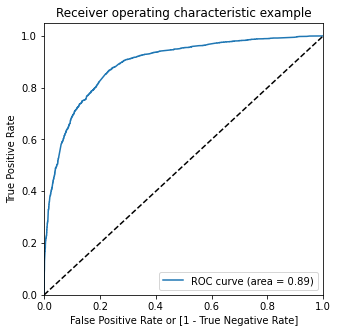

In [93]:
# Plot for ROC-Curve

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [94]:
# To get the Different probabilities of Cutoff values

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.980598,1,1,1,1,1,1,1,1,1,1,1
1,0,0.031040,0,1,0,0,0,0,0,0,0,0,0
2,1,0.568027,1,1,1,1,1,1,1,0,0,0,0
3,1,0.413438,0,1,1,1,1,1,0,0,0,0,0
4,0,0.141974,0,1,1,0,0,0,0,0,0,0,0


In [95]:
# To get the values of accuracy, sensitivity, and specificity at different cutoff values

cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])

from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
cutoff_df

,probability,accuracy,sensitivity,specificity
0.0,0.0,0.376132,1.000000,0.000000
0.1,0.1,0.621325,0.967047,0.412888
0.2,0.2,0.772287,0.913815,0.686959
0.3,0.3,0.804863,0.865230,0.768467
0.4,0.4,0.815509,0.773131,0.841060
0.5,0.5,0.822183,0.706802,0.891747
0.6,0.6,0.811378,0.625264,0.923586
0.7,0.7,0.784205,0.506548,0.951605
0.8,0.8,0.766089,0.428390,0.969689
0.9,0.9,0.720483,0.275454,0.988793


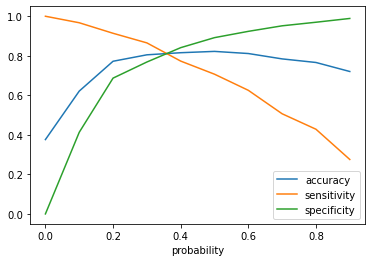

In [96]:
# Plotting the values of accuracy, sensitivity, and specificity at different cutoff values

cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

###  The Optimal Cutoff value is around 0.37

In [97]:
# Cutoff

y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.37 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.980598,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.031040,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.568027,1,1,1,1,1,1,1,0,0,0,0,1
3,1,0.413438,0,1,1,1,1,1,0,0,0,0,0,1
4,0,0.141974,0,1,1,0,0,0,0,0,0,0,0,0


In [98]:
# To get the Overall accuracy scores

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8124900683298903

In [99]:
# Confusion matrix

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3241,  685],
       [ 495, 1872]], dtype=int64)

In [100]:
# True positive
TP = confusion2[1,1]
# True negatives
TN = confusion2[0,0]
# False positives
FP = confusion2[0,1] 
# False negatives
FN = confusion2[1,0]

In [101]:
# Calculate the sensitivity

TP/(TP+FN)

0.7908745247148289

In [102]:
# Calculate the specificity

TN/(TN+FP)

0.825522159959246

In [103]:
# Using Scaler for numerical columns

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])


In [104]:
col = X_train.columns

In [105]:
X_test = X_test[col]
X_test_sm = sm.add_constant(X_test[col])
X_test_sm
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Olark Chat Conversation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
8692,1.0,0.176471,0.133803,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6126,1.0,0.000000,0.000000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5198,1.0,0.176471,0.187060,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4979,1.0,0.235294,0.378961,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
9225,1.0,0.117647,0.032570,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,1.0,0.117647,0.657570,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
3978,1.0,0.117647,0.161532,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7402,1.0,0.000000,0.000000,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1205,1.0,1.000000,0.300176,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [106]:
# y test prediction

y_test_pred = res.predict(X_test_sm)

y_pred_df = pd.DataFrame(y_test_pred)

y_test_df = pd.DataFrame(y_test)

y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Adding y_test_df and y_pred_df

y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Rename the column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.433761
1,1,0.972184
2,1,0.073782
3,1,0.746984
4,0,0.012424


In [107]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.433761,1
1,1,0.972184,1
2,1,0.073782,0
3,1,0.746984,1
4,0,0.012424,0
...,...,...,...
2693,0,0.670239,1
2694,1,0.220468,0
2695,0,0.338820,0
2696,0,0.248110,0


In [108]:
# To get the Overall accuracy scores

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8042994810971089

In [109]:
# Confusion matrix

confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1344,  322],
       [ 206,  826]], dtype=int64)

In [110]:
TP = confusion2[1,1]
# True negatives
TN = confusion2[0,0]
# False positives
FP = confusion2[0,1] 
# False negatives
FN = confusion2[1,0]

In [111]:
# Calculate the sensitivity

TP/(TP+FN)

0.8003875968992248

In [112]:
# Calculate the specificity

TN/(TN+FP)

0.8067226890756303

## Precision and Recall

In [113]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3501,  425],
       [ 694, 1673]], dtype=int64)

In [114]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7974261201143946

In [115]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7068018588931136

In [116]:
# Improting precision_recall_curve from sklearn

from sklearn.metrics import precision_recall_curve

In [117]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       1
 1       0
 2       1
 3       1
 4       0
        ..
 6288    0
 6289    1
 6290    1
 6291    0
 6292    1
 Name: Converted, Length: 6293, dtype: int64,
 0       1
 1       0
 2       1
 3       0
 4       0
        ..
 6288    0
 6289    1
 6290    0
 6291    0
 6292    1
 Name: Predicted, Length: 6293, dtype: int64)

In [118]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)


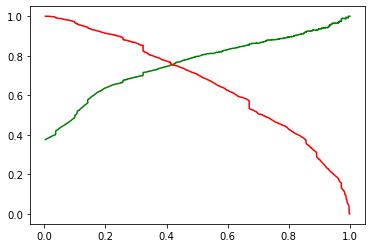

In [119]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

###  Cutoff Value 0.40

In [120]:

y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.40 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.980598,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.031040,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.568027,1,1,1,1,1,1,1,0,0,0,0,1
3,1,0.413438,0,1,1,1,1,1,0,0,0,0,0,1
4,0,0.141974,0,1,1,0,0,0,0,0,0,0,0,0


In [121]:
# To get the Overall accuracy scores

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8155092960432226

In [122]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3302,  624],
       [ 537, 1830]], dtype=int64)

In [123]:
# True positive
TP = confusion2[1,1]
# True negatives
TN = confusion2[0,0]
# False positives
FP = confusion2[0,1] 
# False negatives
FN = confusion2[1,0]

In [124]:
# Precision

TP / (TP + FP)

0.7457212713936431

In [125]:
# Recall

TP / (TP + FN)

0.7731305449936628

# Final Predcition

In [126]:
# y test prediction

y_test_pred = res.predict(X_test_sm)

y_pred_df = pd.DataFrame(y_test_pred)

y_test_df = pd.DataFrame(y_test)


y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Adding y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

# Rename the column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.433761
1,1,0.972184
2,1,0.073782
3,1,0.746984
4,0,0.012424


In [127]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.40 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.433761,1
1,1,0.972184,1
2,1,0.073782,0
3,1,0.746984,1
4,0,0.012424,0
...,...,...,...
2693,0,0.670239,1
2694,1,0.220468,0
2695,0,0.338820,0
2696,0,0.248110,0


# Accuracy Scores

In [128]:
# To get the Overall accuracy scores

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8057820607857672

In [129]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1376,  290],
       [ 234,  798]], dtype=int64)

In [130]:
# True positives
TP = confusion2[1,1]
# True negatives
TN = confusion2[0,0]
# False positives
FP = confusion2[0,1] 
# False negatives
FN = confusion2[1,0]

In [131]:
# Precision

TP / (TP + FP)

0.7334558823529411

In [132]:
# Recall

TP / (TP + FN)

0.7732558139534884

## Precision – Recall: 
### o	On the Training Data:

### Accuracy - 81.55%
### Precision - 74.57%
### Recall - 77.31%


## On the Test Data:

### Accuracy - 80.57%
### Precision - 73.34%
### Recall - 77.32%


# Top Variables Contributing to the model:

		
## •	TOTAL TIME SPENT ON WEBSITE
## •	WHAT IS YOUR CURRENT OCCUPATION_WORKING PROFESSIONAL
## •	LEAD ORIGIN_LEAD ADD FORM

# Lead Source:
## •	Google
## •	Direct Traffic
## •	Organic Search
## •	Referral Sites
## •	Welingak Website

# Lead Origin:
## •	Lead Add Form

# Last Activity:
## •	Olark Chat Conversation
## •	Email
## •	Page Visited on Website
